#### AI61002_Spr2023
#### Tutorial 1: Training LeNet for for MNIST Classification

In [1]:
# import libaries
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms,datasets
import torch.optim as optim
from torch.autograd import Variable
import torchvision

import matplotlib.pyplot as plt

#### Load data

In [2]:
apply_transform = transforms.Compose([transforms.Resize(28), transforms.ToTensor()])
BatchSize = 256 # change according to system specs



trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=1) # Creating dataloader


testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=1) # Creating dataloader
                                        

In [3]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))


No. of samples in train set: 60000
No. of samples in test set: 10000


In [4]:
image, label2 = trainset[0]
image.shape, label2

(torch.Size([1, 28, 28]), 5)

Label:  5


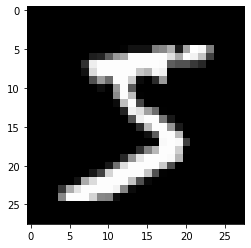

In [5]:
def show_img(img, label):
    print('Label: ', label)
    plt.imshow(torch.squeeze(img), cmap = 'gray')
show_img(*trainset[0])

#### Define model architecture

In [6]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=(5,4),stride=(1,2))
        self.pool1 = nn.MaxPool2d(kernel_size=(2,1),stride=(2,1))
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=1)        
        self.fc1 = nn.Linear(896, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()
        self.logSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool2(x)
        x = x.view(-1, 896)
        x = self.fc1(x)
        x = self.relu(x) 
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return self.logSoftmax(x)

In [7]:
net= LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 4), stride=(1, 2))
  (pool1): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=896, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
  (logSoftmax): LogSoftmax(dim=1)
)


In [8]:
# Define same network for shape print
class LeNet1(nn.Module):
    def __init__(self):
        super(LeNet1, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=(5,4),stride=(1,2))
        self.pool1 = nn.MaxPool2d(kernel_size=(2,1),stride=(2,1))
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=1)        
        self.fc1 = nn.Linear(896, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()
        self.logSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        print("Shape of input:", x.shape)
        x = self.conv1(x)
        print("Shape after 1st Conv:", x.shape)
        x = self.relu(x)
        print("Shape after 1st ReLu:", x.shape)
        x = self.pool1(x)
        print("Shape after 1st MaxPool:", x.shape)
        x = self.conv2(x)
        print("Shape after 2nd Conv:", x.shape)
        x = self.relu(x)
        print("Shape after 2nd Relu:", x.shape)
        x = self.pool2(x)
        print("Shape after 2nd MaxPool:", x.shape)
        x = x.view(-1, 896)
        print("Shape before 1st FC:", x.shape)
        x = self.fc1(x)
        print("Shape after 1st FC:", x.shape)
        x = self.relu(x)
        print("Shape after 3rd ReLu:", x.shape)
        x = self.fc2(x)
        print("Shape after 2nd FC:", x.shape)
        x = self.relu(x)
        print("Shape after 4th ReLu:", x.shape)
        x = self.fc3(x)
        print("Shape after 3rd FC:", x.shape)
        return self.logSoftmax(x)

In [9]:
net1= LeNet1()
#print(net1)
image = image.reshape(1,1,28,28)# To maintain the input shape of the network
net1(image)
#torch.argmax(net1(image),dim=1)

Shape of input: torch.Size([1, 1, 28, 28])
Shape after 1st Conv: torch.Size([1, 6, 24, 13])
Shape after 1st ReLu: torch.Size([1, 6, 24, 13])
Shape after 1st MaxPool: torch.Size([1, 6, 12, 13])
Shape after 2nd Conv: torch.Size([1, 16, 8, 9])
Shape after 2nd Relu: torch.Size([1, 16, 8, 9])
Shape after 2nd MaxPool: torch.Size([1, 16, 7, 8])
Shape before 1st FC: torch.Size([1, 896])
Shape after 1st FC: torch.Size([1, 120])
Shape after 3rd ReLu: torch.Size([1, 120])
Shape after 2nd FC: torch.Size([1, 84])
Shape after 4th ReLu: torch.Size([1, 84])
Shape after 3rd FC: torch.Size([1, 10])


tensor([[-2.2851, -2.3555, -2.3224, -2.3254, -2.3180, -2.1900, -2.3767, -2.2512,
         -2.3138, -2.3005]], grad_fn=<LogSoftmaxBackward0>)

In [10]:
# Check availability of GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    print('GPU is available!')
    device = "cuda"
else:
    print('GPU is not available!')
    device = "cpu"

net = net.to(device)

GPU is not available!


In [11]:
criterion = nn.CrossEntropyLoss() 
learning_rate = 0.01
optimizer = optim.Adam(net.parameters(), lr=learning_rate) # ADAM 
num_epochs = 20

train_loss = []
train_acc = []
for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.to(device),labels.to(device)
        # Initializing model gradients to zero
        
        optimizer.zero_grad() 
        # Data feed-forward through the network
        outputs1 = net(inputs)
        # Predicted class is the one with maximum probability
        preds1 = torch.argmax(outputs1,dim=1)
        # Finding the loss
        loss = criterion(outputs1, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds1==labels)    
        
    totalLoss1 = running_loss/(i+1)
    # Calculating gradients
    totalLoss1.backward()
    # Updating the model parameters
    optimizer.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))

Epoch 1/20 : Training loss: 2.3025 | Training Accuracy: 10.5550
Epoch 2/20 : Training loss: 2.3387 | Training Accuracy: 9.8633
Epoch 3/20 : Training loss: 2.2876 | Training Accuracy: 12.1917
Epoch 4/20 : Training loss: 2.2528 | Training Accuracy: 29.9617
Epoch 5/20 : Training loss: 2.1532 | Training Accuracy: 25.0000
Epoch 6/20 : Training loss: 1.8967 | Training Accuracy: 35.3317
Epoch 7/20 : Training loss: 1.4701 | Training Accuracy: 61.8183
Epoch 8/20 : Training loss: 1.1920 | Training Accuracy: 59.6100
Epoch 9/20 : Training loss: 1.6010 | Training Accuracy: 56.6267
Epoch 10/20 : Training loss: 1.6087 | Training Accuracy: 50.0817
Epoch 11/20 : Training loss: 1.0375 | Training Accuracy: 66.7017
Epoch 12/20 : Training loss: 1.0804 | Training Accuracy: 60.6900
Epoch 13/20 : Training loss: 1.0615 | Training Accuracy: 63.2683
Epoch 14/20 : Training loss: 1.0820 | Training Accuracy: 66.9517
Epoch 15/20 : Training loss: 1.0670 | Training Accuracy: 67.8950
Epoch 16/20 : Training loss: 1.0059

In [12]:
torch.argmax(net(image.to(device)),dim=1)

tensor([3])

Text(0, 0.5, 'Training')

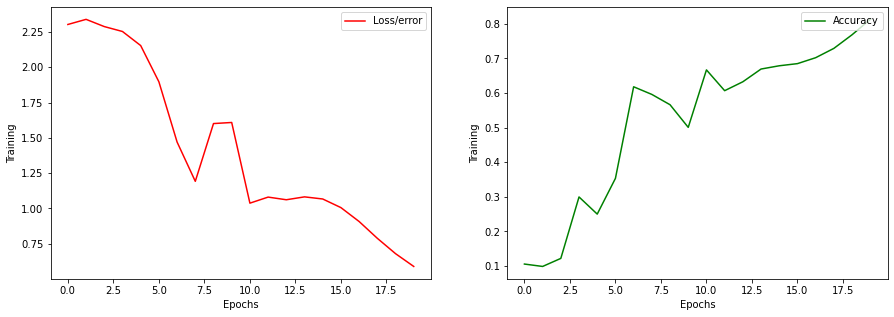

In [13]:
# Plot the curves of tranning loss and training accuracy
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss/error') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')

#### Evaluation of trained model

In [14]:
correct_pred=0
for data in testLoader:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.to(device),labels.to(device)
    # Feedforward test data batch through model
    output = net(inputs) 
    # Predicted class is the one with maximum probability
    preds1 = torch.argmax(output,dim=1)
    correct_pred += torch.sum(preds1==labels)

test_accuracy = correct_pred.item()/10000.0
print('Testing accuracy = ',test_accuracy*100) 

Testing accuracy =  83.28999999999999
